# Predecting if patients will miss their scheduled appointments or not.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment.

> Description of all features and the data itself is [here](https://www.kaggle.com/datasets/joniarroba/noshowappointments)

> Some of them:
* ‘ScheduledDay’ tells us on what day the patient set up their appointment.
* ‘Neighborhood’ indicates the location of the hospital.
* ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.  
* Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

### Question(s) for Analysis we need to answer.
* What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

1. Is there any relationship between showing up and the gender?
2. Is there any relationship between showing up and the age?
3. What is the most disease between **Hipertension** and **Diabetes** affect the absence of the patiente?
4. Is the location of the hospital affect the absence of the patients?


5. Is a certain range of ages are associated with the absence?
6. Do Receiving messages have an effect on comming to the appointment? 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
df = pd.read_csv('KaggleV2-May-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='wrangling'></a>
## Data Wrangling


### Assessing and Building Intuition

In [19]:
df.shape

(110527, 14)

There are 14 columns and 110527 rows in the dataset.

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


Notice: ScheduledDay & AppointmentDay are objects not DayTime.

In [21]:
# This shows the number of unique values in each column.
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [22]:
# The Descriptive statistics for each column.
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [36]:
# Number of null values.
df.isnull().sum().sum()

0

There is no null values in the dataset.


### Data Cleaning

In [7]:
# Making the data type of ScheduledDay & AppointmentDay => DateTime data type.
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

df.dtypes

PatientId                     float64
AppointmentID                   int64
Gender                         object
ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
Age                             int64
Neighbourhood                  object
Scholarship                     int64
Hipertension                    int64
Diabetes                        int64
Alcoholism                      int64
Handcap                         int64
SMS_received                    int64
No-show                        object
dtype: object

In [210]:
# Checking for any not valid ages.
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Age_Stage
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,[50:69]
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,[50:69]
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,[50:69]
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,[6:9]
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,[50:69]


In [99]:
# Ignoring any invalid ages' rows.
df = df[df['Age'] >= 0]

<AxesSubplot:>

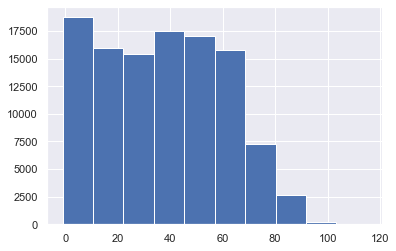

In [214]:
# Number of each Age in the dataset.
Sorted_ages = sorted(df.Age.value_counts().index)
NumberOfAges = df.Age.value_counts()[Sorted_ages]
sns.set()
df['Age'].hist()

# plt.stem(NumberOfAges.index, NumberOfAges.values, use_line_collection=True)
# plt.ylim(0, 4000)
# plt.xlabel('Ages', fontsize=13)
# plt.ylabel('Number of patients', fontsize=13)

> We notice that the distribution of the patients is wide.
>
> So, we will make cuts in the ages with labels like babies, orders or ranges of ages .. etc

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

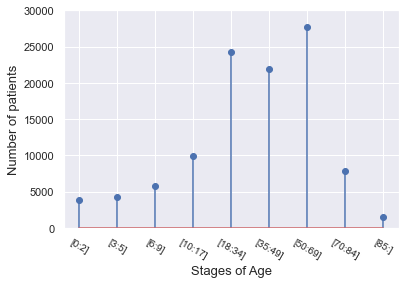

In [232]:
bin_edges = [0, 2, 5, 9, 17, 34, 49, 69, 84, 119]
# labels = ['Infant', 'Toddler', 'Child', 'Teen', 'Young Adult', 'Middle Adult', 'Senior Adult', '[70:85]', '[85:150]']
labels2 = ['[0:2]', '[3:5]', '[6:9]', '[10:17]', '[18:34]', '[35:49]', '[50:69]', '[70:84]', '[85:]']

df['Age_Stage'] = pd.cut(df['Age'],bins=bin_edges, labels=labels2)

NumberOfAges = df.Age_Stage.value_counts()[labels2]
NumberOfAges
sns.set()
fig, ax = plt.subplots()

ax.stem(NumberOfAges.index, NumberOfAges.values)
ax.set_ylim(0, 30000)
ax.set_xlabel('Stages of Age', fontsize=13)
ax.set_ylabel('Number of patients', fontsize=13)
plt.xticks(rotation='-30', fontsize=10)

> Now, we can see that the figure shows us that the age curve is normally distributed, so the age of most of the patients lies from 18 to 70.

AttributeError: 'AxesSubplot' object has no attribute 'set_xticklabel'

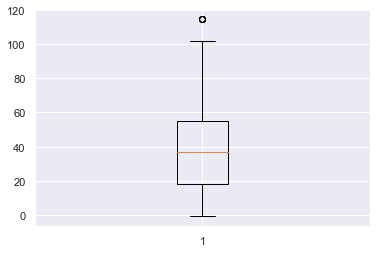

In [226]:
fig, ax = plt.subplots()
ax.boxplot(df['Age'])
ax.set_xticklabel('hello')

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (Replace this header name!)

In [15]:
df.groupby(['No-show', 'Gender'], as_index=False)['PatientId'].count()

,No-show,Gender,PatientId
0,No,F,57246
1,No,M,30962
2,Yes,F,14594
3,Yes,M,7725


### Research Question 2  (Replace this header name!)

<a id='conclusions'></a>
## Conclusions

1